In [1]:
import math 
import numpy as np
import scipy.stats as scs 
import statsmodels.api as sm
from pylab import mpl, plt

Text(0, 0.5, 'index level')

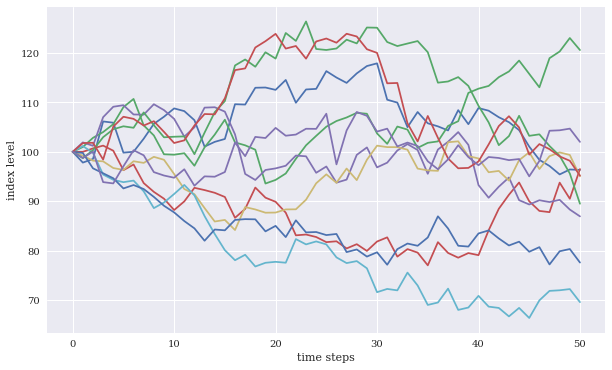

In [22]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

def gen_paths(S0, r, sigma, T, M, I):
    '''Generate Monte Carlo paths for geometric Brownian motion.
                Parameters
                ==========
                S0: float
                    initial stock/index value
                r: float
                    constant short rate
                sigma: float
                    constant volatility
                T: float
                    final time horizon
                M: int
                    number of time steps/intervals
                I: int
                    number of paths to be simulated
                Returns
                =======
                paths: ndarray, shape (M + 1, I)
                    simulated paths given the parameters
                '''
    dt=T/M
    paths = np.zeros((M + 1, I)) 
    paths[0] = S0
    for t in range(1, M + 1):
        rand = np.random.standard_normal(I)
        rand = (rand - rand.mean()) / rand.std()
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * rand)
    return paths

S0 = 100. 
r=0.05
sigma = 0.2
T=1.0
M=50
I = 250000 
np.random.seed(1000)
paths = gen_paths(S0, r, sigma, T, M, I)

S0 * math.exp(r * T)
paths[-1].mean()

plt.figure(figsize=(10, 6))
plt.plot(paths[:, :10])
plt.xlabel('time steps')
plt.ylabel('index level')


In [52]:
paths[:, 0].round(4)

array([100.    ,  97.821 ,  98.5573, 106.1546, 105.899 ,  99.8363,
       100.0145, 102.6589, 105.6643, 107.1107, 108.7943, 108.2449,
       106.4105, 101.0575, 102.0197, 102.6052, 109.6419, 109.5725,
       112.9766, 113.0225, 112.5476, 114.5585, 109.942 , 112.6271,
       112.7502, 116.3453, 115.0443, 113.9586, 115.8831, 117.3705,
       117.9185, 110.5539, 109.9687, 104.9957, 108.0679, 105.7822,
       105.1585, 104.3304, 108.4387, 105.5963, 108.866 , 108.3284,
       107.0077, 106.0034, 104.3964, 101.0637,  98.3776,  97.135 ,
        95.4254,  96.4271,  96.3386])

In [24]:
log_returns = np.log(paths[1:] / paths[:-1])
log_returns[:,0].round(4)

array([-0.022 ,  0.0075,  0.0743, -0.0024, -0.059 ,  0.0018,  0.0261,
        0.0289,  0.0136,  0.0156, -0.0051, -0.0171, -0.0516,  0.0095,
        0.0057,  0.0663, -0.0006,  0.0306,  0.0004, -0.0042,  0.0177,
       -0.0411,  0.0241,  0.0011,  0.0314, -0.0112, -0.0095,  0.0167,
        0.0128,  0.0047, -0.0645, -0.0053, -0.0463,  0.0288, -0.0214,
       -0.0059, -0.0079,  0.0386, -0.0266,  0.0305, -0.0049, -0.0123,
       -0.0094, -0.0153, -0.0324, -0.0269, -0.0127, -0.0178,  0.0104,
       -0.0009])

In [25]:
def print_statistics(array):
    ''' Prints selected statistics.
                 Parameters
                 ==========
                 array: ndarray
                     object to generate statistics on
                 '''
    sta = scs.describe(array)
    print('%14s %15s' % ('statistic', 'value')) 
    print(30 * '-')
    print('%14s %15.5f' % ('size', sta[0])) 
    print('%14s %15.5f' % ('min', sta[1][0])) 
    print('%14s %15.5f' % ('max', sta[1][1])) 
    print('%14s %15.5f' % ('mean', sta[2]))
    print('%14s %15.5f' % ('std', np.sqrt(sta[3]))) 
    print('%14s %15.5f' % ('skew', sta[4])) 
    print('%14s %15.5f' % ('kurtosis', sta[5]))
    
print_statistics(log_returns.flatten())

     statistic           value
------------------------------
          size  12500000.00000
           min        -0.15664
           max         0.15371
          mean         0.00060
           std         0.02828
          skew         0.00055
      kurtosis         0.00085


In [55]:
log_returns.mean() * M + 0.5 * sigma ** 2

0.05000000000000006

In [56]:
log_returns.std() * math.sqrt(M)

0.20000000000000015

In [26]:
import pandas as pd
symbols = ['AAPL.O', 'MSFT.O', 'SPY', 'GLD']
raw = pd.read_csv('/Users/thomasbrown03/Desktop/tr_eikon_eod_data.csv',index_col=0, parse_dates=True).dropna()
noa = len(symbols)
data = raw[symbols]
rets = np.log(data / data.shift(1))
rets.hist(bins=40, figsize=(10, 8))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/thomasbrown03/Desktop/tr_eikon_eod_data.csv'

<AxesSubplot:xlabel='Date'>

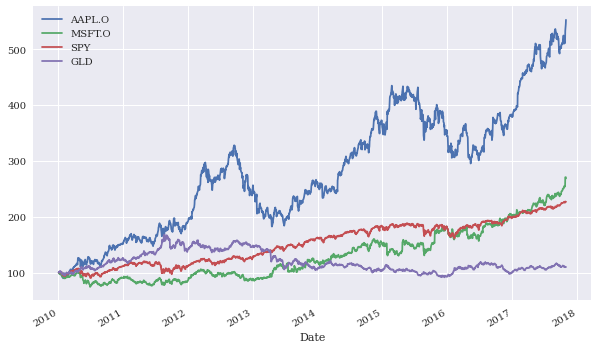

In [58]:
(data / data.iloc[0] * 100).plot(figsize=(10, 6))


In [59]:
log_returns = np.log(data / data.shift(1))
log_returns.head()

,AAPL.O,MSFT.O,SPY,GLD
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.001727,0.000323,0.002644,-0.000911
2010-01-06,-0.016034,-0.006156,0.000704,0.016365
2010-01-07,-0.001850,-0.010389,0.004212,-0.006207
2010-01-08,0.006626,0.006807,0.003322,0.004951


In [27]:
for sym in symbols:
    print('\nResults for symbol {}'.format(sym))
    print(30 * '-')
    log_data = np.array(log_returns[sym].dropna())
    print_statistics(log_data)


Results for symbol AAPL.O
------------------------------


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [28]:
def normality_tests(arr):
    ''' Tests for normality distribution of given data set.
                 Parameters
                 ==========
                 array: ndarray
                     object to generate statistics on Normality Tests '''
    print('Skew of data set %14.3f' % scs.skew(arr))
    print('Skew test p-value %14.3f' % scs.skewtest(arr)[1]) 
    print('Kurt of data set %14.3f' % scs.kurtosis(arr)) 
    print('Kurt test p-value %14.3f' % scs.kurtosistest(arr)[1]) 
    print('Norm test p-value %14.3f' % scs.normaltest(arr)[1])


for sym in symbols:
    print('\nResults for symbol {}'.format(sym))
    print(32 * '-')
    log_data = np.array(log_returns[sym].dropna())
    normality_tests(log_data)


Results for symbol AAPL.O
--------------------------------


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

## Geometric brownian motion model cannot be justified in modeling all asset return distributions

array([[<AxesSubplot:title={'center':'AAPL.O'}>,
        <AxesSubplot:title={'center':'MSFT.O'}>],
       [<AxesSubplot:title={'center':'SPY'}>,
        <AxesSubplot:title={'center':'GLD'}>]], dtype=object)

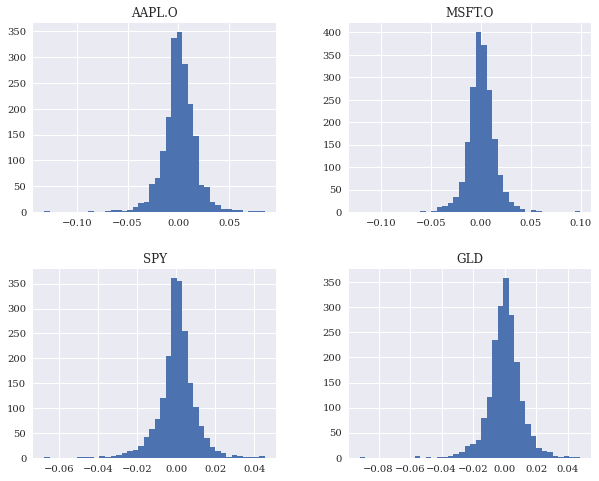

In [62]:
symbols = ['AAPL.O', 'MSFT.O', 'SPY', 'GLD']
noa = len(symbols)
data = raw[symbols]
rets = np.log(data / data.shift(1))
rets.hist(bins=40, figsize=(10, 8))

In [63]:
rets.mean() * 252

AAPL.O    0.218633
MSFT.O    0.126401
SPY       0.104758
GLD       0.012069
dtype: float64

In [64]:
rets.cov() * 252

,AAPL.O,MSFT.O,SPY,GLD
AAPL.O,0.064899,0.022504,0.020903,0.001510
MSFT.O,0.022504,0.050234,0.021608,-0.000426
SPY,0.020903,0.021608,0.021986,0.000002
GLD,0.001510,-0.000426,0.000002,0.027666


With only long positions in the portfolio (positive weight vector), 100% of investor wealth will be divied up into the selected assets. Weights will be randomly generated on (0,1) and normalized such that $$\frac{|w_{i}|}{w}$$ for the i-th asset.

In [65]:
weights = np.random.random(noa)
weights /= np.sum(weights)
weights

array([0.07650728, 0.06021919, 0.63364218, 0.22963135])

The equality constraints of this hypothetical portfolio can be stated as
$$
\sum^I {w_{i}} = 1
$$ 
where $I$ is the number of assets
AND
$$
w_{i} > 0, \forall {0 \leq i \leq I}
$$

In [66]:
np.sum(rets.mean() * weights) * 252

0.09348922407789455

## Covariance Matrix
The covariance matrix is the set of all covariances between the ith and jth asset.
$$
\sigma_{ij} = \sigma_{ji} = E(r_{i}-\mu_{i})(r_{j}-r_{\mu})
$$

In [67]:
np.dot(weights.T, np.dot(rets.cov() * 252, weights))

0.014773304718960326

In [68]:
math.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))


0.12154548415700324

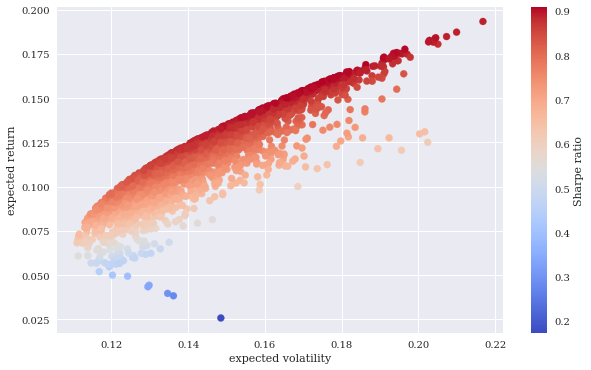

In [69]:
def port_ret(weights):
    return np.sum(rets.mean() * weights) * 252

def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

prets = []
pvols = []
for p in range (2500):
    weights = np.random.random(noa) 
    weights /= np.sum(weights) 
    prets.append(port_ret(weights))
    pvols.append(port_vol(weights))

prets = np.array(prets)
pvols = np.array(pvols)

plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols, marker='o', cmap='coolwarm')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [70]:
import scipy.optimize as sco
def min_func_sharpe(weights):
    return -port_ret(weights) / port_vol(weights)

cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bnds = tuple((0, 1) for x in range(noa))
eweights = np.array(noa * [1. / noa,])
eweights
min_func_sharpe(eweights)

-0.8475033056372995

In [71]:
%%time
opts = sco.minimize(min_func_sharpe, eweights, method='SLSQP', bounds=bnds, constraints=cons)

CPU times: user 36 ms, sys: 1.81 ms, total: 37.8 ms
Wall time: 39.9 ms


In [72]:
opts

     fun: -0.9099024148577988
     jac: array([ 1.13129616e-04, -3.17782164e-04, -9.84892249e-05,  2.31705606e-04])
 message: 'Optimization terminated successfully'
    nfev: 40
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([0.50047648, 0.12199603, 0.31895619, 0.0585713 ])

In [73]:
opts['x'].round(3), port_ret(opts['x']).round(3), port_vol(opts['x']).round(3), port_ret(opts['x']) / port_vol(opts['x'])

(array([0.5  , 0.122, 0.319, 0.059]), 0.159, 0.175, 0.9099024148577988)

The optimal weights, portfolio return, volatility, Sharpe ratio

In [74]:
optv = sco.minimize(port_vol, eweights, method='SLSQP', bounds=bnds, constraints=cons)
optv

     fun: 0.11066224869709516
     jac: array([0.11160342, 0.11085507, 0.11078554, 0.11050452])
 message: 'Optimization terminated successfully'
    nfev: 40
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([0.        , 0.01406   , 0.54375387, 0.44218612])

In [75]:
optv['x'].round(3)

array([0.   , 0.014, 0.544, 0.442])

In [76]:
cons = ({'type': 'eq', 'fun': lambda x: port_ret(x) - tret}, {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bnds = tuple((0, 1) for x in weights)

%time
trets = np.linspace(0.05, 0.2, 50)
tvols = []
for tret in trets:
    res = sco.minimize(port_vol, eweights, method='SLSQP', bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs


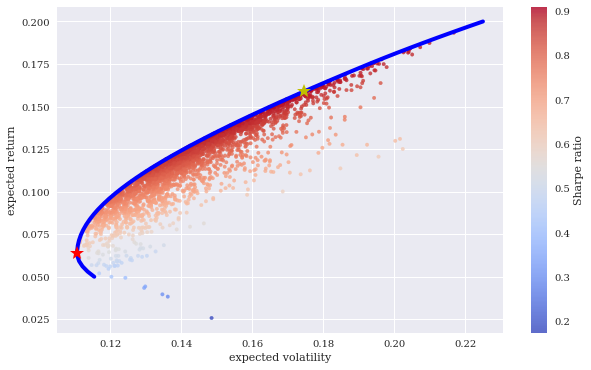

In [77]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols, marker='.', alpha=0.8, cmap='coolwarm')
plt.plot(tvols, trets, 'b', lw=4.0)
plt.plot(port_vol(opts['x']), port_ret(opts['x']), 'y*', markersize=15.0)
plt.plot(port_vol(optv['x']), port_ret(optv['x']), 'r*', markersize=15.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [78]:
import scipy.interpolate as sci

ind = np.argmin(tvols)
evols = tvols[ind:]
erets = trets[ind:]

tck = sci.splrep(evols, erets)

def f(x):
    ''' Efficient frontier function (splines approximation). ''' 
    return sci.splev(x, tck, der=0)
def df(x):
    ''' First derivative of efficient frontier function. ''' 
    return sci.splev(x, tck, der=1)


In [79]:
def equations(p, rf=0.01): 
    eq1=rf-p[0]
    eq2=rf+p[1]*p[2]-f(p[2]) 
    eq3 = p[1] - df(p[2])
    return eq1, eq2, eq3

opt = sco.fsolve(equations, [0.01, 0.5, 0.15])
opt

array([0.01      , 0.85547098, 0.1924466 ])

In [80]:
np.round(equations(opt), 6)

array([ 0.,  0., -0.])

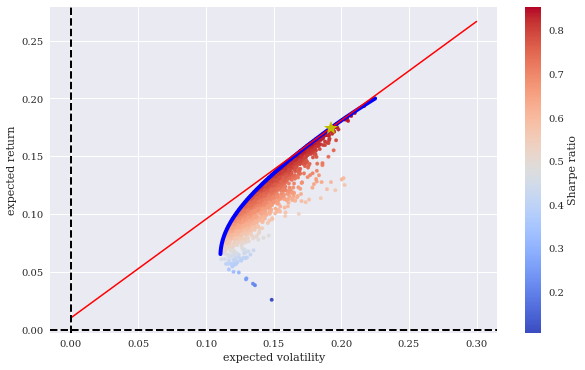

In [81]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=(prets - 0.01) / pvols, marker='.', cmap='coolwarm')
plt.plot(evols, erets, 'b', lw=4.0)
cx = np.linspace(0.0, 0.3)
plt.plot(cx, opt[0] + opt[1] * cx, 'r', lw=1.5)
plt.plot(opt[2], f(opt[2]), 'y*', markersize=15.0)
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [82]:
cons = ({'type': 'eq', 'fun': lambda x: port_ret(x) - f(opt[2])}, {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
res = sco.minimize(port_vol, eweights, method='SLSQP', bounds=bnds, constraints=cons)
res['x'].round(3)

array([0.587, 0.139, 0.274, 0.   ])

In [83]:
port_ret(res['x'])

0.17463247889930397

In [84]:
port_vol(res['x'])

0.19244550015359585

In [85]:
port_ret(res['x']) / port_vol(res['x'])

0.9074386190372088

In [86]:
S = np.random.normal(0.12,.1,10000) #10000 sampled normal returns
print_statistics(S)
normality_tests(S)

     statistic           value
------------------------------
          size     10000.00000
           min        -0.27354
           max         0.48362
          mean         0.11951
           std         0.10073
          skew        -0.00360
      kurtosis        -0.00629
Skew of data set         -0.004
Skew test p-value          0.883
Kurt of data set         -0.006
Kurt test p-value          0.926
Norm test p-value          0.985


In [87]:
M = []
noa = 50
for i in range(noa):
    M.append(S[np.random.randint(10001)])
M = np.asarray(m)
normality_tests(m)

NameError: name 'm' is not defined

In [ ]:
#Computation of covariance matrix

symbols = ['AAPL.O','MSFT.O','INTC.O','AMZN.O','GS.N','SPY','.SPX','.VIX','EUR=','XAU=','GDX','GLD']
raw = pd.read_csv('/Users/thomasbrown03/Desktop/tr_eikon_eod_data.csv',index_col=0, parse_dates=True).dropna()
noa = len(symbols)
data = raw[symbols]
rets = np.log(data / data.shift(1))

weights = np.random.random(noa)
weights /= np.sum(weights)
covM = rets.cov
#Covariance of portfolio
%time
covP = np.dot(weights.T, np.dot(rets.cov() * 252 ,weights))
covP

CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 50.3 µs


0.010152644739681924

In [3]:
from numpy import cov, linalg
from scipy.linalg import decomp_cholesky as dc
from scipy.linalg import decomp_svd as ds
from scipy.linalg import inv
import cvxopt
from cvxopt import solvers
from cvxopt import matrix

A = np.asarray(np.random.normal(.12,0.1,1000))
B = np.asarray(np.random.normal(.12,0.1,1000))
C = np.asarray(np.random.normal(.12,0.1,1000))
A1 = np.asarray(np.random.normal(.12,0.1,1000))
B2 = np.asarray(np.random.normal(.12,0.1,1000))
C3 = np.asarray(np.random.normal(.12,0.1,1000))

weights = np.array([np.random.randn(6)])/6

X = np.stack((A,B,C,A1,B2,C3),axis=0)
rets = np.array([np.sum(A),np.sum(B),np.sum(C),np.sum(A1),np.sum(B2),np.sum(C3)])/1000
covM = np.cov(X)
port_vol = np.dot(weights,np.dot(covM,weights.T))

dim = covM.shape[0]
P = 2*matrix(covM)
q = matrix([0.0]*dim)
G = -1*matrix(np.identity(dim))
h = matrix(np.zeros((dim,1)))

%time
sol = solvers.qp(P,q,G,h)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.96 µs
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  6e+00  2e+00  2e+00
 1:  5.7633e-02 -5.7633e-02  1e-01  2e-16  3e-16
 2:  8.4459e-03 -8.4459e-03  2e-02  4e-16  1e-17
 3:  1.2377e-03 -1.2377e-03  2e-03  9e-17  6e-18
 4:  1.8138e-04 -1.8138e-04  4e-04  5e-17  1e-18
 5:  2.6580e-05 -2.6580e-05  5e-05  2e-17  3e-19
 6:  3.8952e-06 -3.8952e-06  8e-06  5e-18  2e-19
 7:  5.7083e-07 -5.7083e-07  1e-06  2e-18  1e-19
 8:  8.3653e-08 -8.3653e-08  2e-07  1e-18  4e-20
 9:  1.2259e-08 -1.2259e-08  2e-08  3e-19  3e-20
Optimal solution found.


In [4]:
U,sig,W = ds.svd(covM)
U

array([[-0.36198557,  0.33514169, -0.42240385,  0.73875189, -0.13982799,
         0.11364532],
       [-0.7739766 , -0.0342922 ,  0.4295411 , -0.01634705,  0.45143664,
        -0.10590771],
       [ 0.0518133 ,  0.37827215,  0.67946838,  0.09279001, -0.41835546,
         0.4570744 ],
       [-0.02201916,  0.11643149,  0.22524711,  0.11337024, -0.43946329,
        -0.85395656],
       [ 0.51158494,  0.26465787,  0.25847857,  0.42368633,  0.62563216,
        -0.17464302],
       [-0.07097924,  0.81228948, -0.24050928, -0.50299654,  0.13072193,
        -0.08490756]])

In [5]:
s = np.diag(sig)
s

array([[0.01136618, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.01058212, 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.01022721, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.01000262, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.00953951,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00933906]])

In [6]:
W

array([[-0.36198557, -0.7739766 ,  0.0518133 , -0.02201916,  0.51158494,
        -0.07097924],
       [ 0.33514169, -0.0342922 ,  0.37827215,  0.11643149,  0.26465787,
         0.81228948],
       [-0.42240385,  0.4295411 ,  0.67946838,  0.22524711,  0.25847857,
        -0.24050928],
       [ 0.73875189, -0.01634705,  0.09279001,  0.11337024,  0.42368633,
        -0.50299654],
       [-0.13982799,  0.45143664, -0.41835546, -0.43946329,  0.62563216,
         0.13072193],
       [ 0.11364532, -0.10590771,  0.4570744 , -0.85395656, -0.17464302,
        -0.08490756]])

In [29]:
def normality_tests(arr):
    ''' Tests for normality distribution of given data set.
                 Parameters
                 ==========
                 array: ndarray
                     object to generate statistics on Normality Tests '''
    print('Skew of data set %14.3f' % scs.skew(arr))
    print('Skew test p-value %14.3f' % scs.skewtest(arr)[1]) 
    print('Kurt of data set %14.3f' % scs.kurtosis(arr)) 
    print('Kurt test p-value %14.3f' % scs.kurtosistest(arr)[1]) 
    print('Norm test p-value %14.3f' % scs.normaltest(arr)[1])

In [103]:
# Number of assets and periods
noa = 50    # 50 assets
per = 100   # 100 periods

# Target return
target = 0.15

# Generate random normally distributed returns for noa assets over per periods
rets = np.random.normal(loc=0.08, scale=0.1, size=(per, noa))

# Covariance matrix (C)
C = matrix(np.cov(rets * 100, rowvar=False))

# No linear term in the objective function (q = 0)
q = matrix(np.zeros(noa))

# Equality constraint: sum of weights = 1 and mean return = target
A = np.vstack([np.ones(noa), np.mean(rets, axis=0) * 100])  # Stack the constraints
A = matrix(A)  # Transpose A because cvxopt requires A.T
b = matrix(np.array([1, target]))  # Vector of equality constraints

# Solve the quadratic programming problem
sol = solvers.qp(C, q, A, b)

# Extract the optimal portfolio weights
x_opt = np.array(sol['x'])

print("Optimal portfolio weights:")
print(x_opt)

     pcost       dcost       gap    pres   dres
 0:  7.3660e-03 -7.0990e-01  4e+00  2e+00  1e+02
 1:  5.7461e-03 -2.6882e-01  3e-01  3e-02  2e+00
 2:  1.1527e-03 -6.5204e-03  8e-03  4e-16  7e-16
 3:  8.0489e-05 -3.5613e-04  4e-04  5e-16  3e-16
 4:  1.7422e-06 -3.7120e-05  4e-05  3e-16  8e-17
 5:  5.8427e-10 -6.3650e-07  6e-07  9e-17  9e-18
 6:  5.8506e-14 -6.3634e-09  6e-09  6e-17  2e-19
Optimal solution found.
Optimal portfolio weights:
[[-8.36347668e-10]
 [-1.35714588e-08]
 [-1.13667980e-08]
 [-3.81372504e-10]
 [-8.56866970e-10]
 [-1.20160548e-08]
 [-7.90050209e-09]
 [ 9.96023929e-09]
 [-2.12710646e-09]
 [ 1.41383685e-09]
 [ 8.92808856e-09]
 [-1.55418437e-08]
 [-1.64886196e-08]
 [-5.70100208e-10]
 [-5.21641899e-09]
 [-6.86721704e-09]
 [-1.63688385e-08]
 [-1.17124025e-08]
 [-3.96864467e-09]
 [-6.22432354e-09]
 [ 4.17700435e-09]
 [-1.47529051e-08]
 [-1.34745579e-08]
 [-1.11191858e-08]
 [-4.71181648e-09]
 [-3.46543391e-09]
 [ 1.11864506e-08]
 [-6.54713310e-09]
 [-9.88270227e-09]
 [-1.06

In [79]:
# Extract the optimal portfolio weights
x_opt = np.array(sol['x'])


TypeError: '<' not supported between instances of 'builtin_function_or_method' and 'int'

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
symbols = ['AAPL', 'SPY', 'AMZN', 'GOOGL', 'ADM']
raw = yf.download(symbols,period='1y',interval='1wk')
#rets = np.log(data / data.shift(1))
data = pd.DataFrame(raw)
rets = np.log(data/data.shift(1))
rets = rets.Close

covM = rets.cov() * 52
noa = len(symbols)
weights = np.random.random(noa)
weights /= np.sum(weights)
covM

[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,ADM,AMZN,GOOGL,SPY
Ticker,,,,,
AAPL,0.054262,-0.006773,0.024892,0.034088,0.017033
ADM,-0.006773,0.124510,0.008695,-0.016766,0.007063
AMZN,0.024892,0.008695,0.065533,0.027144,0.024761
GOOGL,0.034088,-0.016766,0.027144,0.086613,0.021289
SPY,0.017033,0.007063,0.024761,0.021289,0.016540


In [253]:
import scipy.optimize as so
from cvxopt import solvers
from scipy.linalg import cholesky,norm

## what we want to minimize

def port_vol(weights):
    return np.dot(weights.T,np.dot(covM,weights))
def port_ret(weights):
    return np.sum(weights * rets.mean()) * 52
covM = np.asarray(covM)
cons = ({'type':'eq','fun':lambda x: np.sum(x) - 1})
bnds = tuple((0, 1) for x in range(noa))
eweights = np.array(noa * [1. / noa,])

res = so.minimize(port_vol, eweights, method='SLSQP', constraints=cons, bounds=bnds)
opt = res['x'].round(3)

port_vol(opt),port_ret(opt)


G = cholesky(covM)
norm(G.T @ weights,2)

0.143395562890587

In [272]:
from mosek.fusion import *
import mosek.fusion.pythonic 
import sys

# Define function solving the optimization model
def Markowitz(N, m, G, gamma2):
    with Model("markowitz") as M:
        # Settings
        M.setLogHandler(sys.stdout) 

        # Decision variable (fraction of holdings in each security)
        # The variable x is restricted to be positive, which imposes the constraint of no short-selling.   
        x = M.variable("x", N, Domain.greaterThan(0.0)) 

        # Budget constraint
        M.constraint('budget', Expr.sum(x) == 1)

        # Objective 
        M.objective('obj', ObjectiveSense.Maximize, x.T @ m)

        # Imposes a bound on the risk
        M.constraint('risk', Expr.vstack(gamma2, 0.5, G.T @ x), Domain.inRotatedQCone())

        # Solve optimization
        M.solve()
        
        # Check if the solution is an optimal point
        solsta = M.getPrimalSolutionStatus()
        if (solsta != SolutionStatus.Optimal):
            # See https://docs.mosek.com/latest/pythonfusion/accessing-solution.html about handling solution statuses.
            raise Exception("Unexpected solution status!") 
        
        returns = M.primalObjValue()
        portfolio = x.level()
        
    return returns, portfolio

gamma2 = 0.05

G = cholesky(covM)

In [1]:
mu = np.asarray(rets.mean())

f, x = Markowitz(noa, mu, G, gamma2)
print("========================\n")
print("RESULTS:")
print(f"Optimal expected portfolio return: {f*100:.4f}%")
print(f"Optimal portfolio weights: {x}")
print(f"Sum of weights: {np.sum(x)}")

NameError: name 'np' is not defined